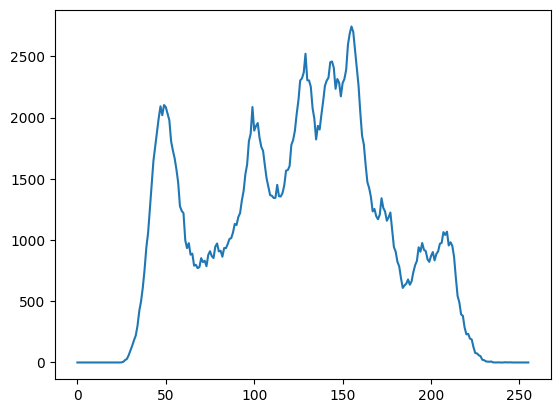

In [1]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(hist)
plt.show()

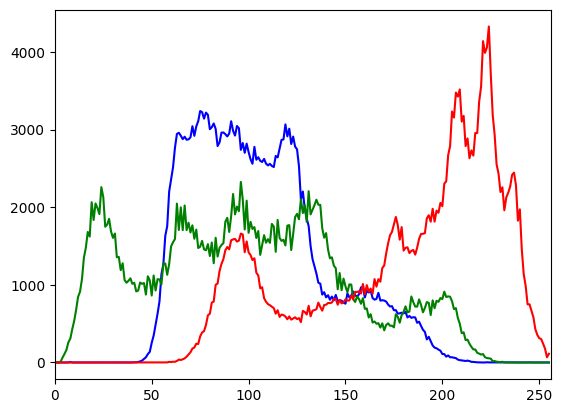

In [ ]:
src = cv2.imread("lenna.bmp")

colors = ["b", "g", "r"]
bgr_planes = cv2.split(src)

for p, c in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)
    plt.xlim([0, 256])

plt.show()

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist


src = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

histImg = getGrayHistImage(hist)

cv2.imshow("hist", histImg)
cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)

alpha = 1.0
dst = np.clip((1 + alpha) * src - 128 * alpha, 0, 255).astype(np.uint8)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

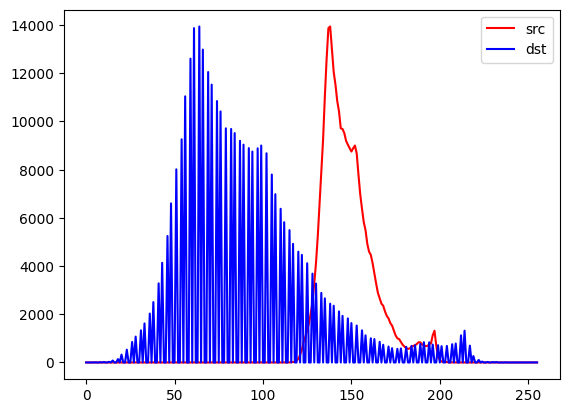

In [14]:
src = cv2.imread("Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

srcHist = cv2.calcHist([src], [0], None, [256], [0, 256])
dstHist = cv2.calcHist([dst], [0], None, [256], [0, 256])

plt.plot(srcHist, "r", label="src")
plt.plot(dstHist, "b", label="dst")
plt.legend()
plt.show()

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [26]:
src = cv2.imread("Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

dst = cv2.equalizeHist(src)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("field.bmp")
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# 0: Y, 1: Cr, 2: Cb
# Y 채널만 히스토그램 평활화 (밝기 조정)
src_ycrcb[:, :, 0] = cv2.equalizeHist(src_ycrcb[:, :, 0])

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
import cv2

initialized = False

src = cv2.imread("candies.png")
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)


def on_trackbar(pos):
    if not initialized:
        return

    hmin = cv2.getTrackbarPos("H_min", "dst")
    hmax = cv2.getTrackbarPos("H_max", "dst")

    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow("dst", dst)


cv2.imshow("src", src)
cv2.namedWindow("dst")

cv2.createTrackbar("H_min", "dst", 50, 179, on_trackbar)
cv2.createTrackbar("H_max", "dst", 80, 179, on_trackbar)

initialized = True

on_trackbar(0)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import sys
import numpy as np
import cv2


# 녹색 배경 동영상
cap1 = cv2.VideoCapture("woman.mp4")

if not cap1.isOpened():
    print("video open failed!")
    sys.exit()

# 비오는 배경 동영상
cap2 = cv2.VideoCapture("raining.mp4")

if not cap2.isOpened():
    print("video open failed!")
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print("frame_cnt1:", frame_cnt1)
print("frame_cnt2:", frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 합성 여부 플래그
do_composit = False

# 전체 동영상 재생
while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (70, 255, 255))
        cv2.copyTo(frame2, mask, frame1)

    cv2.imshow("frame", frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(" "):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()

frame_cnt1: 409
frame_cnt2: 353


In [10]:
src = cv2.imread("rose.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)

for ksize in (3, 5, 7):
    dst = cv2.blur(src, (ksize, ksize))

    desc = f"Mean: {ksize}x{ksize}"
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow("dst", dst)
    cv2.waitKey()

cv2.destroyAllWindows()

In [13]:
src = cv2.imread("rose.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)

for sigma in range(1, 6):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)

    desc = f"sigma = {sigma}"
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow("dst", dst)
    cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("rose.bmp", cv2.IMREAD_GRAYSCALE)

src_f = src.astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
dst = np.clip(2.0 * src_f - blr, 0, 255).astype(np.uint8)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("rose.bmp")

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

src_f = src_ycrcb[:, :, 0].astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
src_ycrcb[:, :, 0] = np.clip(2.0 * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("noise.bmp", cv2.IMREAD_GRAYSCALE)

dst = cv2.medianBlur(src, 3)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("tekapo.bmp")

trn = np.array([[1, 0, 200], [0, 1, 100]], dtype=np.float32)

dst = cv2.warpAffine(src, trn, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
src = cv2.imread("tekapo.bmp")

aff = np.array([[1, 0.5, 0], [0, 1, 0]], dtype=np.float32)

h, w = src.shape[:2]
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("rose.bmp")

dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280))  # cv2.INTER_LINEAR
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

cv2.imshow("src", src)
cv2.imshow("dst1", dst1[500:900, 400:800])
cv2.imshow("dst2", dst2[500:900, 400:800])
cv2.imshow("dst3", dst3[500:900, 400:800])
cv2.imshow("dst4", dst4[500:900, 400:800])
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread("cat.bmp")

rc = (250, 120, 200, 200)

cpy = src.copy()
cv2.rectangle(cpy, rc, (0, 0, 255), 2)

cv2.imshow("src", cpy)
cv2.waitKey()

for i in range(1, 4):
    src = cv2.pyrDown(src)
    cpy = src.copy()
    cv2.rectangle(cpy, rc, (0, 0, 255), 2, shift=i)
    cv2.imshow("src", cpy)
    cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
import math
import cv2
import numpy as np

src = cv2.imread("tekapo.bmp")

rad = 20 * math.pi / 180

aff = np.array(
    [[math.cos(rad), math.sin(rad), 0], [-math.sin(rad), math.cos(rad), 0]],
    dtype=np.float32,
)

dst = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
src = cv2.imread("tekapo.bmp")

cp = (src.shape[1] // 2, src.shape[0] // 2)

rot = cv2.getRotationMatrix2D(cp, 20, 1.0)

dst = cv2.warpAffine(src, rot, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [6]:
src = cv2.imread("namecard.jpg")

w, h = 720, 400

srcQuad = np.array([[222, 95], [622, 178], [547, 416], [145, 317]], np.float32)
dstQuad = np.array([[0, 0], [w - 1, 0], [w - 1, h - 1], [0, h - 1]], np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
src = cv2.imread("tekapo.bmp")

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32)
map2 = map2 + 10 * np.sin(map1 / 32)

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
import sys
import numpy as np
import cv2


def drawROI(img, corners):
    cpy = img.copy()

    c1 = (192, 192, 255)
    c2 = (128, 128, 255)

    for pt in corners:
        cv2.circle(cpy, tuple(pt.astype(int)), 25, c1, -1, cv2.LINE_AA)

    cv2.line(
        cpy,
        tuple(corners[0].astype(int)),
        tuple(corners[1].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )
    cv2.line(
        cpy,
        tuple(corners[1].astype(int)),
        tuple(corners[2].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )
    cv2.line(
        cpy,
        tuple(corners[2].astype(int)),
        tuple(corners[3].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )
    cv2.line(
        cpy,
        tuple(corners[3].astype(int)),
        tuple(corners[0].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )

    disp = cv2.addWeighted(img, 0.3, cpy, 0.7, 0)

    return disp


def onMouse(event, x, y, flags, param):
    global srcQuad, dragSrc, ptOld, src

    if event == cv2.EVENT_LBUTTONDOWN:
        for i in range(4):
            if cv2.norm(srcQuad[i] - (x, y)) < 25:
                dragSrc[i] = True
                ptOld = (x, y)
                break

    if event == cv2.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False

    if event == cv2.EVENT_MOUSEMOVE:
        for i in range(4):
            if dragSrc[i]:
                dx = x - ptOld[0]
                dy = y - ptOld[1]

                srcQuad[i] += (dx, dy)

                cpy = drawROI(src, srcQuad)
                cv2.imshow("img", cpy)
                ptOld = (x, y)
                break


# 입력 이미지 불러오기
src = cv2.imread("Q5_scanned.jpg")

if src is None:
    print("Image open failed!")
    sys.exit()

# 입력 영상 크기 및 출력 영상 크기
h, w = src.shape[:2]
dw = 500
dh = round(dw * 297 / 210)  # A4 용지 크기: 210x297cm

# 모서리 점들의 좌표, 드래그 상태 여부
srcQuad = np.array([[30, 30], [30, h - 30], [w - 30, h - 30], [w - 30, 30]], np.float32)
dstQuad = np.array([[0, 0], [0, dh - 1], [dw - 1, dh - 1], [dw - 1, 0]], np.float32)
dragSrc = [False, False, False, False]

# 모서리점, 사각형 그리기
disp = drawROI(src, srcQuad)

cv2.imshow("img", disp)
cv2.setMouseCallback("img", onMouse)

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER 키
        break
    elif key == 27:  # ESC 키
        cv2.destroyWindow("img")
        sys.exit()

# 투시 변환
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh), flags=cv2.INTER_CUBIC)

# 결과 영상 출력
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
import sys
import cv2
import numpy as np

src = cv2.imread("dial.jpg")

if src is None:
    print("Image open failed!")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)  # sigma = 1.0

def on_trackbar(pos):

    rmin = cv2.getTrackbarPos("minRadius", "img")
    rmax = cv2.getTrackbarPos("maxRadius", "img")
    th = cv2.getTrackbarPos("threshold", "img")

    circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50, param1=120, param2=th, minRadius=rmin, maxRadius=rmax)

    dst = src.copy()

    if circles is not None:
        for i in range(circles.shape[1]):
            cx, cy, radius = np.uint16(circles[0][i])
            cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow("img", dst)

cv2.imshow("img", src)

cv2.createTrackbar("minRadius", "img", 0, 100, on_trackbar)
cv2.createTrackbar("maxRadius", "img", 0, 150, on_trackbar)
cv2.createTrackbar("threshold", "img", 1, 100, on_trackbar)
cv2.setTrackbarPos("minRadius", "img", 10)
cv2.setTrackbarPos("maxRadius", "img", 80)
cv2.setTrackbarPos("threshold", "img", 40)
cv2.waitKey()

cv2.destroyAllWindows()